In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [2]:
# File reading
dat_file = np.load('data/student.npz')
A_learn = dat_file['A_learn']
b_learn = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']


m = 395 # number of read examples (total:395)
n = 27 # features
m_learn = 300
x = np.zeros(28)
dodes = []
test_r = []

# Функции
fx = lambda x:(np.linalg.norm((A_learn@x)-b_learn))**2
func_test = lambda x:(np.linalg.norm((A_test@x)-b_test))**2
getG = lambda x:2*A_learn.T@(A_learn@x-b_learn)

[ 2.19936516e-02  2.40737837e-02  1.55251728e-02  5.78830989e-02
  1.57139680e-01  1.52689911e-01 -2.20118968e-01  2.77084664e-02
 -1.42861818e-01 -1.42533666e-01 -1.03174854e-01 -9.50907697e-02
 -7.09896472e-03  9.61129130e-02  1.11442531e-01 -2.19249049e-01
  1.27178851e-01  7.06888189e-02  3.77959284e-01  5.90306324e-02
 -1.35377773e-01 -1.53470440e-01  2.66420188e-01  1.76394595e-02
  1.82991714e-01  4.31719219e-01  3.63602178e+00  1.05694557e+01]
[37111.39167871929, 35054.87961646955, 33151.78908274672, 31387.377709280663, 29748.590590293607, 28223.847779051594, 26802.859808539008, 25476.467459820487, 24236.502515827764, 23075.6666821169, 21987.42623923824, 20965.92032207676, 20005.881007038104, 19102.563634473972, 18251.686006603435, 17449.375285008966, 16692.121570543324, 15976.737285609981, 15300.32159723585, 14660.22922169619, 14054.043039880713, 13479.550029010863, 12934.720082370253, 12417.687345810706, 11926.733749166486, 11460.27445340412, 11016.844971264723, 10595.0897511

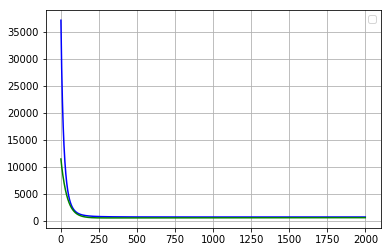

In [17]:
def grad(A_learn, b_learn,x, gfx, dodes):
    L=np.amax(np.linalg.eigh(A_learn.T@A_learn)[0])*28
    for i in range (2000):
        gfx=getG(x)
        x=x-1/L*gfx
        fx_in= fx(x)
        test_r.append(func_test(x))
        dodes.append(fx_in)
    return(x)


def show(data, namefile, legends=[],  colors=[], title="", xlabel="", ylabel=""):
    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    colors = iter(colors if colors else ["b", "g", "r", "go:"])
    plt.legend(tuple([plt.plot(el, next(colors)) for el in data]), tuple(legends), loc = 'best')
    plt.grid()
    plt.savefig(f'{namefile}.png', format = 'png')

dodes = []
test_r = []
z = grad(A_learn, b_learn, x, getG(x), dodes)
print(z)
print (dodes)
show([dodes,test_r], namefile="graph")

In [18]:
rank_A_learn = 0
print('Rank of matrix A_learn ({:d} rows, {:d} cols.): {:d}\n'.format(m_learn,n+1,rank_A_learn))
error = func_test(z)
print(error)
error=error/(len(b_test))
print(error)

Rank of matrix A_learn (300 rows, 28 cols.): 0

626.155366837998
6.591109124610505
